# One-way ANOVA:

##### Note : ANOVA uses the F-test to determine whether the variability between group means is larger than the variability of the observations within the groups. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Check Assumptions

In [7]:
import scipy.stats as stats

#### The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. 

Ho: Distribution is normally distributed

Ha: Distribution is not normally distributed

In [8]:
print(stats.shapiro(iris.sepal_width))

ShapiroResult(statistic=0.9849170446395874, pvalue=0.10113201290369034)


At 95% confidence level we fail to reject the Null Hypothesis as  p-value > 0.05
Hence, the distribution is a normal distribution

#### The Levene test 

Tests the null hypothesis that all input samples are from populations with equal variances.

In [9]:
# Groups
iris_virginica = iris.sepal_width[iris.species == 'virginica']
iris_versicolor = iris.sepal_width[iris.species == 'versicolor']
iris_setosa = iris.sepal_width[iris.species == 'setosa']

In [10]:
stats.levene(iris_virginica, iris_versicolor, iris_setosa)

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

At 95% confidence level we fail to reject the Null Hypothesis as  p-value > 0.05
Hence, the 3 distributions have equal variances

### Visualization

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

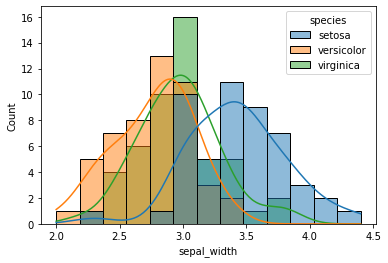

In [11]:
sns.histplot(x='sepal_width', hue='species', kde=True, data=iris)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

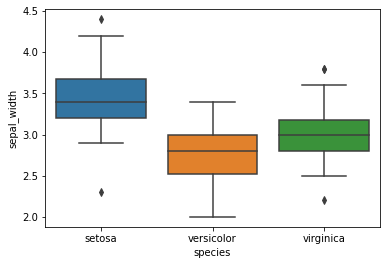

In [12]:
sns.boxplot(x='species', y='sepal_width', data=iris)

In [13]:
iris.groupby('species')['sepal_width'].mean()

species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64

### ANOVA

The Hypothesis for the One Way ANOVA are:
    
* $H_0$: $All\,the\, population\, means\, are\, equal.$
* $H_a$: $At \,least\,one\,of\,the\, population\, means\, are\, unequal.$


Let us the perform ANOVA.

In [14]:
from statsmodels.formula.api import ols      # ols is technique used to build regression models
from statsmodels.stats.anova import anova_lm # to retrieve ANOVA table

In [15]:
formula = 'sepal_width ~ C(species)'
model = ols(formula, iris).fit()
aov_table = anova_lm(model)
print(aov_table)

               df     sum_sq   mean_sq         F        PR(>F)
C(species)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual    147.0  16.962000  0.115388       NaN           NaN


We see that the p-value is less than alpha (0.05). Thus, we $\textbf{Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).
This means at least one particular category in the 'species' variable has different mean of sepal_width as compared to the other categories.

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd # For performing the Tukey-HSD test
from statsmodels.stats.multicomp import MultiComparison # To compare the levels of independent with the dependent variables

In [17]:
mcomp = MultiComparison(iris.sepal_width, iris.species)
print(mcomp.tukeyhsd().summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658  0.001 -0.8189 -0.4971   True
    setosa  virginica   -0.454  0.001 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


As per tukeyhsd, no two means of sepal width are equal